<a href="https://colab.research.google.com/github/valentinas0515/my_first_repo/blob/main/ASSIGNMENT_VALENTINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT - KEY EXECUTIVE PAY**
### *Presented by: Valentina Sánchez Arenas - 20699569*







##Problem Solving Methodology

For the development of this assignment, the problem-solving methodology was followed to carry out a clear approach to the requirements of the exercise and solve it in a clear and structured way.

The process of problem solving I will use can be broken down into 5 key steps:

* State the problem clearly
* Describe the input and output information
* Work the problem by hand
* Develop an algorithm 
+ Test solution with a variety of data

#Problem Statement

Prompts the user for a company's stock market ticker symbol. Then, scrapes the Yahoo Finance website to extract information on the key of the company. For each executive calculate the expected income tax based on the ATO tax tables. The user can choose if the data will be saved as a CSV and/or stored in an SQLite database.

**RECOMMENDATION:**  consider tickers from Australian companies, due to the TAX Rates applied in this exercise were provided by the ATO (Australian Taxation Office). 


# Input & Output Information

## Input: 
Get the ticker symbol from the user
 
## Processing:  
* Use the symbol to go to the profile page
* Get the table
  - for each row get the pay
  -  Use pay to calulate tax


##Output:

 Save the information as CSV and/or Save as SQLite

#Try to work an example by hand


Here is the table from the website YAHOO FINANCE for WOW.AX (Woolworths Group ticker):


```
Name	               Title	Pay	Exercised	Year born
Mr. Bradford Leon    CEO & Exec. Director	4.36M	N/A	N/A
Mr. Stephen Harrison Chief Financial Officer	1.43M	N/A	N/A
Ms. Natalie Davis	Managing Director of Supermarkets	1.41M	N/A	N/A
Ms. Claire Peters	Managing Director of B2B & Everyday Needs	676.11k	N/A	N/A
Mr. John Hunt	Chief Information & Replenishment Officer	N/A	N/A	N/A
Mr. Paul van Meurs	Head of Investor Relations	N/A	N/A	N/A
Mr. Bill Reid	Chief Legal Officer	N/A	N/A	N/A
Mr. Andrew Hicks	Chief Marketing Officer	N/A	N/A	N/A
Ms. Caryn Katsikogianis	Chief People Officer	N/A	N/A	N/A
Mr. David Walker	Chief Risk Officer	N/A	N/A	N/A

```


```

Name	                                Title	               Pay	
Mr. Bradford Leon Banducci BComm     CEO & Exec. Director	 4.36M
```


For this excercise the only columns that are taken into consideration are NAME, TITLE & PAY

###Lets do another row, this time for COLES.AX

```
bame	               Title	         Pay	
Mr. Steven Cain	MD, CEO & Director	3.33M	
```
So Pay (or salary) is 3.33M

#Want to calculate the tax

Need to extract the 3.33 and multiply is by 1000,000 to five me the dollar amount 

To calculate the TAX, the Individual Income Tax Rates of Australia were considered:


```
Taxable income           Tax on this income

0 – $18,200              Nil

$18,201 – $45,000        19 cents for each $1 over $18,200

$45,001 – $120,000       $5,092 plus 32.5 cents for each $1 over $45,000

$120,001 – $180,000      $29,467 plus 37 cents for each $1 over $120,000

$180,001 and over        $51,667 plus 45 cents for each $1 over $180,000
```
From: https://www.ato.gov.au/rates/individual-income-tax-rates/



# Exploring the Website
* Stock Ticker Symbol: A stock symbol is a unique series of letters assigned to a security for trading purposes. From: http://www.investopedia.com/terms/s/stocksymbol.

* How to get the correct web page address once the user prompts the ticker? ***understanding the URL structure*** : 

* Once  we get into Yahoo Finance, need to click on the 'Profile' tab. Using an example a ticker symbol profile looks as follows: 

  - For WOW.AX (Woolworths Group) https://au.finance.yahoo.com/quote/WOW.AX/profile?p=WOW.AX

  - For COLAX.AX (Coles Group) https://au.finance.yahoo.com/quote/COL.AX/profile?p=COL.AX

* Notice that the ticker appears twice in the Profile URL, which means the next step is to create an algorithm where I can add the ticker symbol to the URL once the user prompts it. This way the user extracts automatically the information from the URL web page and the algorithm proceeds to make the data processing. 

# Creating the algorithm

##The libraries

Python Libraries are a set of useful functions that eliminate the need for writing codes from scratch. The following libraries were considered for the developing purposes of this assignment.

* BeautifulSoup: This is a helpful module that makes it easy to scrape information from web pages.

* Pandas: Library for data analysis 

* Kora: Contains tools for Google Colab programming

* SQLite is a library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. 

*matplotlib is a module from pandas libraries used to plot different graphics using dataframes. 

From:
https://www.mygreatlearning.com/

https://mode.com/python-tutorial/libraries/pandas/

https://pypi.org/project/beautifulsoup4/

https://docs.python.org/3/library/sqlite3/



In [14]:
# Install the Packages
!pip install kora -q

#Load packages
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

##Define the functions

In [4]:
def build_url():
  ''' This function will build the URL of the profile page considering the ticker the user inserts'''
  ticker = input("Please type in a ticker symbol ")
  url_pattern = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
  result = url_pattern.format(ticker, ticker)
  return result

In [5]:
def get_record(row):
  ''' This function will structure the table's rows and headings'''
  cells = row.find_all('td')
  name = cells[0].text
  title =  cells[1].text
  pay = cells[2].text
  return {'name': name, 'title': title, 'pay': pay}


In [6]:
def get_rows(soup):
  ''' This function will build the structure of the table'''
  # Get the table!
  table = soup.find('table')

  # get to the row
  body = table.find('tbody')
  rows = body.find_all('tr')
  return rows

In [7]:
def calculate_tax(income):
  ''' 
  This function will calculate tha tax to be paid by every excecutive in the company considering the Individual income tax rates extracted from ATO.
  FROM: https://www.ato.gov.au/rates/individual-income-tax-rates/
  '''
  
  if income <= 18200:
    tax_payable = 0
  elif 18200 < income <= 45000:
    tax_payable = 0.19 * (income - 18200)
  elif 45000 < income < 120000:
    tax_payable = 5092 + 0.32 * (income - 45000)
  elif 120001 < income < 180000:
    tax_payable = 29467 + 0.37 * (income - 120000)
  elif income > 180000:
    tax_payable = 51667 + 0.45 * (income - 180000)


  return tax_payable

In [8]:
def get_salary(pay):  
  ''' This function converts the salary denomination into a numeric value, taking 
  letter k as thousands and M as millions'''
  last_char = pay[-1]
  if last_char == 'M':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000000
  elif last_char == 'k':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000
  else: # Must be a N/A
    sal = 0
  return sal


#Saving the table in CSV or SQL

The table below will be saved in the collab folder in CSV format or SQL format according to the user's decision.

The file can be downloaded by pressing the folder 'content' located at the left of the collab page, selecting the file, clicking on the 3 dots at the left of the file, and pressing download.


In [21]:
def save_table(exec_df):
  '''this fuction will save the table in CSV or SQL format according to User's choice'''
  
  format = int(input('what format do you wish to save the table? **press 1 for "csv" or 2 for "sql"** '))

  if format == 1 : 
    df = pd.DataFrame(exec_df, columns= ['name', 'title', 'pay', 'tax'])
    df.to_csv (r'Table of excecutives.csv', index = False, header=True)
    print('Your table was saved succesfully in CSV format')
   

  elif format == 2 :
    conn = sqlite3.connect('table_of_excecutives_SQL')
    c = conn.cursor()
    df = pd.DataFrame(exec_df, columns= ['name', 'title', 'pay', 'tax'])
    df.to_sql('exec_df', conn, if_exists='replace', index = False)
    c.execute('''  
    SELECT * FROM exec_df
              ''')
    for row in c.fetchall():
        print (row)
    print('Your table was saved succesfully in SQL format')
  
  else: 
    print('Please try again')

  return save_table


# FINAL RESULT 
*Insert the ticker WOW.AX* 

In [22]:
#Once the functions are defined, the next step is get the program ready 

name = str(input('Hello! What is your name? '))
print('Welcome on board ' + name + '!')

url = build_url()
wd.get(url)
soup = BeautifulSoup(wd.page_source,'html.parser')
rows = get_rows(soup)

# getting all the records
records = []
for row in rows:
  rec = get_record(row)
  records.append(rec)

# adding the tax column
for rec in records:
  sal = get_salary(rec['pay'])
  rec['tax'] = calculate_tax(sal)

exec_df = pd.DataFrame.from_records(records)
exec_df

savetable = save_table(exec_df)

Hello! What is your name? Valentina
Welcome on board Valentina!
Please type in a ticker symbol WOW.AX
what format do you wish to save the table? **press 1 for "csv" or 2 for "sql"** 1
Your table was saved succesfully in CSV format


#TESTING THE DATA

Let's see in a bar graph, the difference in taxes that executives must pay in the company

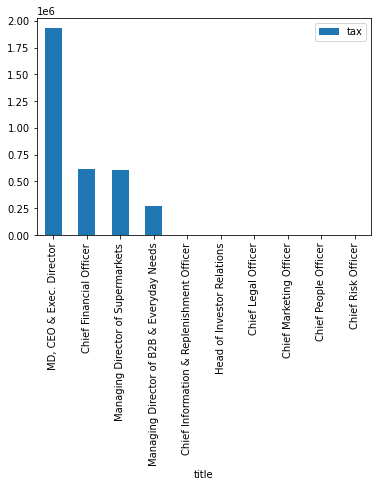

In [35]:
df = pd.DataFrame(exec_df, columns= ['title', 'tax'])
df.plot(x ='title', y= 'tax', kind = 'bar')
plt.show()

